In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data Import

In [106]:
Customer_Acquisition = pd.read_csv('Customer Acqusition.csv')
Spend = pd.read_csv('spend.csv')
Repayment = pd.read_csv('Repayment.csv')

#### Data Cleaning on Customer_Acquisition 

In [4]:
Customer_Acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [5]:
Customer_Acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [6]:
Customer_Acquisition.drop('No',axis=1,inplace=True)

#### Data Cleaning on Spend data 

In [7]:
Spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [8]:
Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


#### Data Cleaning on Repay data

In [9]:
Repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [10]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [11]:
Repayment.drop(columns = 'Unnamed: 4', inplace =True)
Repayment.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [12]:
Repayment.isnull().sum()

SL No:      24
Customer    23
Month       23
Amount      23
dtype: int64

In [13]:
Repayment.dropna(inplace = True)
Repayment.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

### 1.) In the above dataset 

#### a. In case age is less than 18, replace it with mean of age values.

In [14]:
Mean_age_before = Customer_Acquisition['Age'].mean()
print(Mean_age_before)
Customer_Acquisition['Age'] = np.where(Customer_Acquisition.Age < 18,Mean_age_before,Customer_Acquisition.Age)
Mean_age_after = Customer_Acquisition['Age'].mean()
print(Mean_age_after)

46.49
48.399399999999986


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [15]:
Customer_Spend = pd.merge(left=Customer_Acquisition, right=Spend, how ='inner', on='Customer')
Customer_Spend['Amount'] = np.where(Customer_Spend.Amount>Customer_Spend.Limit,(Customer_Spend.Limit)* 0.5,Customer_Spend.Amount)
Customer_Spend.head(10)

,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
5,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,23-Feb-05,SANDALS,168285.60
6,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,1-Feb-05,CAR,23370.20
7,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,12-Jan-04,TRAIN TICKET,440563.22
8,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,5-Feb-04,BUS TICKET,52208.65
9,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,19-Apr-06,AIR TICKET,346925.68


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [16]:
Customer_Repayment = pd.merge(left=Customer_Acquisition, right=Repayment, how ='inner', on='Customer')
Customer_Repayment['Amount']=np.where(Customer_Repayment.Amount>Customer_Repayment.Limit,Customer_Repayment.Limit,Customer_Repayment.Amount)
Customer_Repayment.head(10)

,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62
5,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7.0,1-Feb-05,14473.41
6,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103.0,12-Jan-04,350446.82
7,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117.0,5-Feb-04,117964.43
8,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131.0,19-Apr-06,79849.19
9,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,145.0,22-Nov-05,402099.78


### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [17]:
Customer_Acquisition['Customer'].nunique()

100

In [18]:
Customer_Spend['Customer'].nunique()

100

In [19]:
Customer_Repayment['Customer'].nunique()

100

#### b. How many distinct categories exist?

In [20]:
Customer_Acquisition['Product'].nunique()

3

In [21]:
Customer_Spend['Product'].nunique()

3

In [22]:
print(Customer_Repayment['Product'].drop_duplicates())
print(Customer_Repayment['Product'].drop_duplicates().count())

0         Gold
17      Silver
28    Platimum
Name: Product, dtype: object
3


####  c. What is the average monthly spend by customers?

In [23]:
Customer_Spend['Month'] = pd.to_datetime(Customer_Spend['Month'])
Customer_Spend['Month_Name'] = Customer_Spend['Month'].apply(lambda x : pd.Timestamp.strftime(x,format="%B"))
Average_Monthly_Spend = Customer_Spend.groupby(['Customer','Month_Name']).Amount.mean().reset_index()
Average_Monthly_Spend.head(20)

,Customer,Month_Name,Amount
0,A1,April,261649.250000
1,A1,August,344372.100000
2,A1,February,175235.690000
3,A1,January,372762.587143
4,A1,May,361141.310000
5,A1,November,183839.610000
6,A1,October,244534.680000
7,A10,April,270721.680000
8,A10,August,454827.230000
9,A10,February,194557.667500


####  d. What is the average monthly repayment by customers?

In [24]:
Customer_Repayment['Month'] = pd.to_datetime(Customer_Repayment['Month'])
Customer_Repayment['Month_Name'] = Customer_Repayment['Month'].apply(lambda x : pd.Timestamp.strftime(x,format="%B"))
Average_Monthly_Repayment = Customer_Repayment.groupby(['Customer','Month_Name']).Amount.mean().reset_index()
Average_Monthly_Repayment.head(20)

,Customer,Month_Name,Amount
0,A1,April,254474.580000
1,A1,February,156374.760000
2,A1,January,318731.923333
3,A1,July,297176.740000
4,A1,November,285729.090000
5,A1,September,186427.500000
6,A10,April,159582.470000
7,A10,February,217344.503333
8,A10,January,272897.385000
9,A10,July,358194.650000


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
 

In [49]:
Customer_Spend_Repayment = pd.merge(left = Average_Monthly_Spend, right = Average_Monthly_Repayment, left_on = ['Customer','Month_Name'], right_on = ['Customer','Month_Name'] )

In [51]:
Customer_Spend_Repayment.head()


,Customer,Month_Name,Amount_x,Amount_y
0,A1,April,261649.250000,254474.580000
1,A1,February,175235.690000,156374.760000
2,A1,January,372762.587143,318731.923333
3,A1,November,183839.610000,285729.090000
4,A10,April,270721.680000,159582.470000


In [52]:
Customer_Spend_Repayment['Monthly_Profit'] = (Customer_Spend_Repayment.Amount_y - Customer_Spend_Repayment.Amount_x)
Customer_Spend_Repayment.head(10)

,Customer,Month_Name,Amount_x,Amount_y,Monthly_Profit
0,A1,April,261649.250000,254474.580000,-7174.670000
1,A1,February,175235.690000,156374.760000,-18860.930000
2,A1,January,372762.587143,318731.923333,-54030.663810
3,A1,November,183839.610000,285729.090000,101889.480000
4,A10,April,270721.680000,159582.470000,-111139.210000
5,A10,February,194557.667500,217344.503333,22786.835833
6,A10,January,161144.326667,272897.385000,111753.058333
7,A10,July,239798.030000,358194.650000,118396.620000
8,A10,March,134631.266667,240130.543333,105499.276667
9,A10,May,189207.392500,98672.695000,-90534.697500


In [53]:
Customer_Spend_Repayment['Final_Profit'] = np.where(Customer_Spend_Repayment['Monthly_Profit'] > 0 , Customer_Spend_Repayment['Monthly_Profit']*0.029, "None" )
Customer_Spend_Repayment.head(10)

,Customer,Month_Name,Amount_x,Amount_y,Monthly_Profit,Final_Profit
0,A1,April,261649.250000,254474.580000,-7174.670000,None
1,A1,February,175235.690000,156374.760000,-18860.930000,None
2,A1,January,372762.587143,318731.923333,-54030.663810,None
3,A1,November,183839.610000,285729.090000,101889.480000,2954.794920000001
4,A10,April,270721.680000,159582.470000,-111139.210000,None
5,A10,February,194557.667500,217344.503333,22786.835833,660.818239166667
6,A10,January,161144.326667,272897.385000,111753.058333,3240.8386916666673
7,A10,July,239798.030000,358194.650000,118396.620000,3433.501980000001
8,A10,March,134631.266667,240130.543333,105499.276667,3059.479023333333
9,A10,May,189207.392500,98672.695000,-90534.697500,None


####  f. What are the top 5 product types? 

In [54]:
Top_Product_types = Customer_Spend.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending=False)
Top_5_Product_Types = Top_Product_types.reset_index().drop(columns = 'index')[0:5]
print("Top 5 Product Types are {0}".format(Top_5_Product_Types))

Top 5 Product Types are            Type       Amount
0         PETRO  28597384.98
1        CAMERA  27690738.44
2          FOOD  20519243.60
3    AIR TICKET  20155847.12
4  TRAIN TICKET  19995825.72


#### g. Which city is having maximum spend?



In [55]:
City_Spend  = Customer_Spend.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False)
top_city = City_Spend.reset_index().drop(columns = 'index')[0:1]
top_city


,City,Amount
0,COCHIN,45963513.5


####  h. Which age group is spending more money?


In [56]:
Customer_Spend['Age_Group']  = np.where( (Customer_Spend.Age.astype('int') >= 18) & (Customer_Spend.Age.astype('int') <= 45) , 'Adults' , 'Senior' ) 
Customer_Spend.groupby('Age_Group').Amount.sum().reset_index().sort_values(by = 'Amount', ascending= False)

,Age_Group,Amount
1,Senior,1.117011e+08
0,Adults,1.080799e+08


#### i. Who are the top 10 customers in terms of repayment?

In [57]:
Top_Repayment  = Customer_Repayment.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False)
Top_10_Customer_Repayment = Top_Repayment.reset_index().drop(columns = 'index')[0:11]
Top_10_Customer_Repayment

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [58]:
Customer_Spend['Yearly_Spend'] = Customer_Spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))
Citywise_spend = pd.pivot_table(data = Customer_Spend, index = 'City', columns= ['Product','Yearly_Spend'], values = 'Amount', aggfunc = 'sum')
Citywise_spend.head(30)

Product             Gold                              Platimum              \
Yearly_Spend        2004         2005         2006        2004        2005   
City                                                                         
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA      7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI       1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN        7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI         2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                       Silver                         
Yearly_Spend        2006        2004       2005        2006  
City                                                         
BANGALORE      685831.27  1291852.58  830612.34  1415480.94  
BOMBAY         972130.01   532089.03  508988.54  1092833.80  
CALCUTTA      3589606.66   500006.00  440147.06  1157956.42  
CHENNAI       5024923.40   282056.86  377184.49   350009.50  
COCHIN        4920592.29   814229.62  652269.38  1269990.87  
DELHI          176788.72   768172.30  612311.21   854899.97  
PATNA         1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM    2147403.75   209667.48  269912.99   555862.12

<AxesSubplot:xlabel='City'>

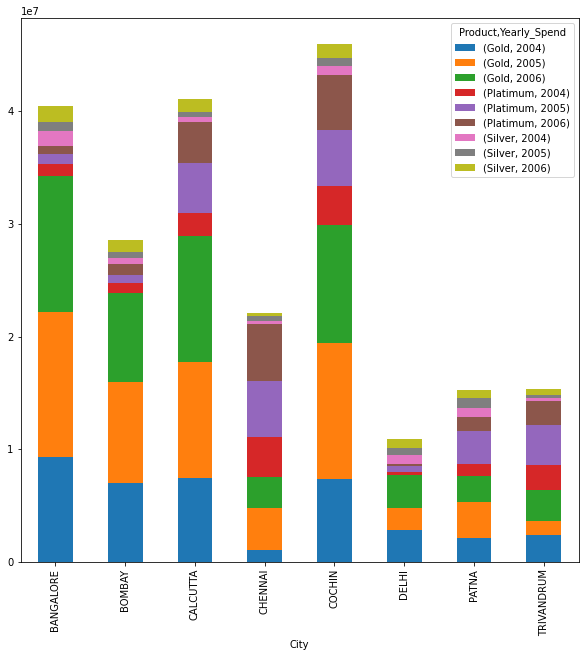

In [59]:
Citywise_spend.plot(kind ='bar' , figsize =(10,10) , stacked = True)

### 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

<AxesSubplot:xlabel='City'>

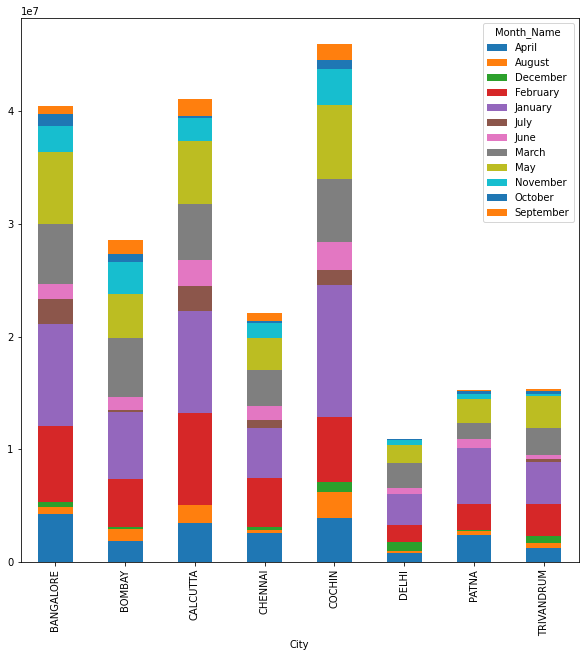

In [60]:
City_wise= pd.pivot_table(data = Customer_Spend, index = 'City', columns = 'Month_Name', values = 'Amount', aggfunc = 'sum')
City_wise.plot(kind = 'bar', stacked = True, figsize = (10,10))

#### b. Comparison of yearly spend on air tickets

<AxesSubplot:xlabel='Type'>

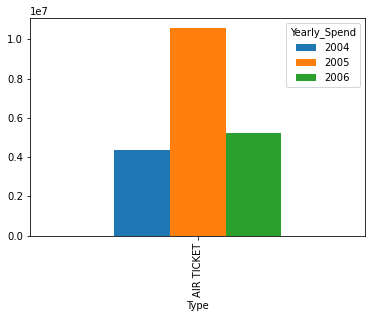

In [69]:
Yearwise_Spend = pd.pivot_table(data = Customer_Spend[Customer_Spend.Type== 'AIR TICKET'], index = 'Type' , columns = 'Yearly_Spend', values = 'Amount', aggfunc = 'sum')
Yearwise_Spend.head(10)
Yearwise_Spend.plot(kind = 'bar')

####  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
 

<AxesSubplot:xlabel='Month_Name'>

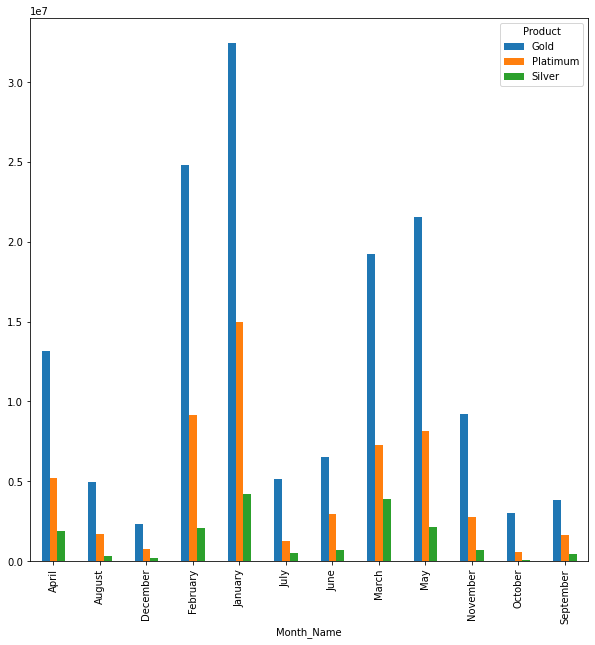

In [72]:
Monthwise_Spend = pd.pivot_table( data = Customer_Spend , index = 'Month_Name' , columns = 'Product' , values = 'Amount' , aggfunc = 'sum' )
Monthwise_Spend.plot(kind = 'bar', figsize = (10,10))

 Among all the months, **January** stands out to have highest sales in all the product categories

### 5. Write user defined PYTHON function to perform the following analysis:

#### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [100]:
Customer_Repayment['Yearly'] = Customer_Repayment['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))
Customer_Repayment['Monthly'] = Customer_Repayment['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))

In [126]:
def top_10(Product , Time_Period ):
    return Customer_Repayment.groupby(['Customer','City', 'Product',Time_Period]).Amount.mean().reset_index().sort_values('Amount',ascending = False).head(10)

In [127]:
Product = input('Please enter the product category that should be in Gold/Silver/Platinum :')
Time_Period = input('Please enter the time_period thst should be Monthly/Yearly: ')

Please enter the product category that should be in Gold/Silver/Platinum :Gold
Please enter the time_period thst should be Monthly/Yearly: Monthly


In [128]:
Top_10_Customers = top_10( Product , Time_Period )
Top_10_Customers

,Customer,City,Product,Monthly,Amount
542,A89,CALCUTTA,Gold,April,497237.97
266,A38,CHENNAI,Platimum,December,492660.82
426,A54,COCHIN,Platimum,September,490775.95
291,A40,CALCUTTA,Platimum,August,488742.81
177,A27,CHENNAI,Gold,June,484419.68
533,A80,BOMBAY,Silver,March,481205.64
69,A17,BOMBAY,Gold,December,479227.30
501,A66,PATNA,Gold,January,477039.78
275,A39,TRIVANDRUM,Platimum,April,472407.74
172,A27,CHENNAI,Gold,August,472123.57
